# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df
    
df = generate_data()

In [2]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [5]:
# insert code here
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [6]:
import numpy as np

cov_mat = np.cov(X_train_std.T)

In [7]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

D:\Programs\Anaconda\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\Programs\Anaconda\lib\site-packages\matplotlib\transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
D:\Programs\Anaconda\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


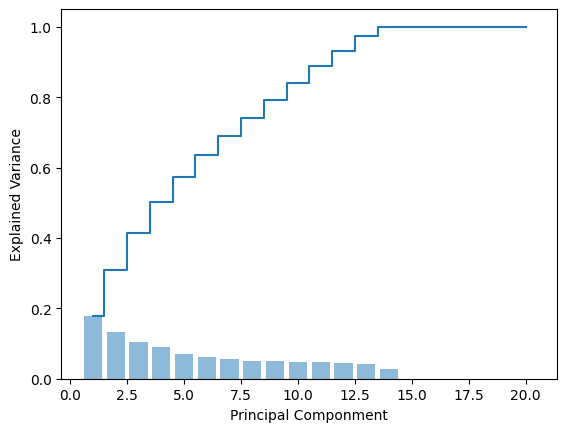

In [8]:
import matplotlib.pyplot as plt

tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,21), var_exp, alpha=0.5, align='center', label='Variance Explained')
plt.step(range(1,21), cum_var_exp, where='mid', label='Cumulative Explained')
plt.xlabel('Principal Componment')
plt.ylabel('Explained Variance')
plt.show()

> Since there's no principal component that explains a large portion of the variance in data, we will have to use a higher number of principal components. According to the graph, about 80% of the data is explained with 10 principal components, so it would be best use 10 principal components in the model

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [9]:
# Insert code here
target_groups = df.groupby(['target']).target.count()

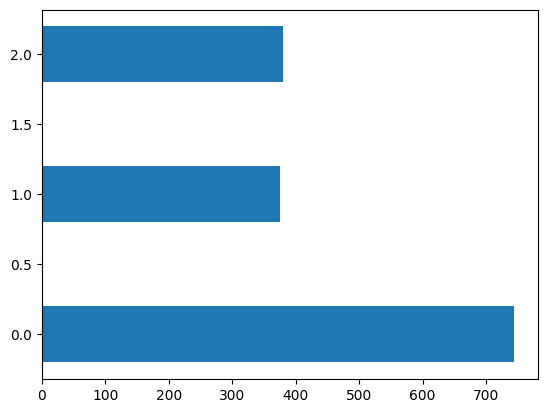

In [10]:
plt.barh(target_groups.index, target_groups, height=0.4)
plt.show()

> The results here show that the dataset is inbalance in favor of class zero. This means that accuracy would not be a good evaluation metric. Here, we could use a weighted F1-score instead to evaluate the models.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [11]:
# Insert code here
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p = Pipeline([
    ('scaling', StandardScaler()),
    ('model', LogisticRegression())
])

params = {'model__C': [0.01, 0.1, 1, 10]}

lr_cv = GridSearchCV(p, param_grid=params, scoring='f1_weighted', cv=5, refit=True)
lr_cv = lr_cv.fit(X_train, y_train)

lr_cv.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', LogisticRegression(C=10))])

In [12]:
print(f'Validation score: {lr_cv.best_score_:.2%}')
print(f'Test score: {lr_cv.score(X_test, y_test):.2%}')

Validation score: 71.88%
Test score: 70.27%


In [13]:
y_hat = lr_cv.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



> For the test data, the accuracy is 70%. The precision came back as 75% for class 0, 68% for class 1, and 62% for class 2. The recall was 76% for class 0, 59% for class 1, and 68% for class 2. For this model, using GridSearch, we chose a logistic regression model with a C hyperparameter equal to 10.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [15]:
# Insert code
from sklearn.decomposition import PCA

p = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression())
])

params = {'model__C': [0.01, 0.1, 1, 10], 'pca__n_components': [5, 6, 7, 8, 9, 10, 11, 12]}

lr_pca_cv = GridSearchCV(p, param_grid=params, scoring='f1_weighted', cv=5, refit=True)
lr_pca_cv = lr_pca_cv.fit(X_train, y_train)

lr_pca_cv.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=11)),
                ('model', LogisticRegression(C=0.1))])

In [16]:
print(f'Validation score: {lr_pca_cv.best_score_:.2%}')
print(f'Test score: {lr_pca_cv.score(X_test, y_test):.2%}')

Validation score: 70.69%
Test score: 69.78%


In [17]:
y_hat = lr_pca_cv.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       153
         1.0       0.64      0.55      0.59        74
         2.0       0.65      0.68      0.67        73

    accuracy                           0.70       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.70      0.70      0.70       300



> For this model, the accuracy was 70%. The precision for was 75% for class 0, 64% for class 1, and 65% for class 2. The recall was 78% for class 0, 55% for class 1, and 68% for class 2. The weighted average for the f1 score was 70%. Comparing the metrics from both models, there is not much difference. After using GridSearch, the hyperparameters selected for this model were 11 prinicpal components (k) and 0.1 for C.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [18]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier

p = Pipeline([
    ('scaling', StandardScaler()),
    ('model', DecisionTreeClassifier())
])

params = {'model__max_depth': [1, 5, 10, 15, 20]}

dt_cv = GridSearchCV(p, param_grid=params, scoring='f1_weighted', cv=5, refit=True)
dt_cv = dt_cv.fit(X_train, y_train)

dt_cv.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=10))])

In [19]:
print(f'Validation score: {dt_cv.best_score_:.2%}')
print(f'Test score: {dt_cv.score(X_test, y_test):.2%}')

Validation score: 75.45%
Test score: 69.54%


In [20]:
y_hat = dt_cv.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77       153
         1.0       0.59      0.64      0.61        74
         2.0       0.69      0.58      0.63        73

    accuracy                           0.70       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.70      0.70      0.70       300



> The weighted F1 test score for this model was 69.54%, and for the other logistic regression models, each had a weighted F1 test score of 70.27% (without PCA) and 69.78% (with PCA). Thus, this model did not perform better.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [24]:
# Insert code here

p = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeClassifier())
])

params = {'model__max_depth': [1, 5, 10, 15, 20], 'pca__n_components': [5, 6, 7, 8, 9, 10, 11, 12]}

dt_pca_cv = GridSearchCV(p, param_grid=params, scoring='f1_weighted', cv=5, refit=True)
dt_pca_cv = dt_pca_cv.fit(X_train, y_train)

dt_pca_cv.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=6)),
                ('model', DecisionTreeClassifier(max_depth=10))])

In [25]:
print(f'Validation score: {dt_pca_cv.best_score_:.2%}')
print(f'Test score: {dt_pca_cv.score(X_test, y_test):.2%}')

Validation score: 69.43%
Test score: 69.84%


In [27]:
y_hat = dt_pca_cv.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77       153
         1.0       0.67      0.59      0.63        74
         2.0       0.62      0.63      0.63        73

    accuracy                           0.70       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.70      0.70      0.70       300



> The weighted F1 test score here returned as 69.84%. From this model, the precision was 75% for class 0, 67% for class 1, and 62% for class 2. The recall was 78% for class 0, 59% for class 1, and 63% for class 2. The F1 score was 77% for class 0, 63% for class 1, and 63% for class 2. These scores are not much different to the same scores from the Logistic Regression and Decision Tree (without PCA) models. Thus, this model did not perform any better.